In [1]:
import numpy as np
np.set_printoptions(threshold=1000)

import matplotlib.pyplot as plt
import time
import os
%matplotlib inline

from keras.callbacks import LearningRateScheduler, History

Using TensorFlow backend.


In [2]:
import sys
sys.path.append('/home/albert/github/tensorflow/src/')
import evaluation,data, training, models

In [3]:
P_param = 5
K_param = 4

In [4]:
train_dict, train_files = data.get_data('train')

1.00803184509


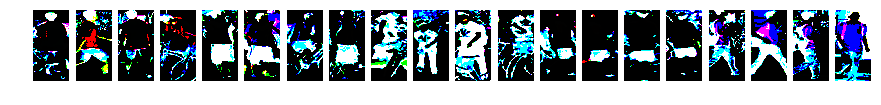

In [5]:
start = time.time()
batch = data.batch_generator(train_dict, P=P_param, K=K_param, preprocess=True,
                                    shape=(256,128)).next()
print time.time() - start

i = 0

plt.figure(figsize=(15,2))
for j in range(P_param*K_param):
    plt.subplot(1,20,j+1)
    im = batch[0][i][j].squeeze().astype(np.uint8)
#         print im.min(), im.max()
    plt.imshow(im)
    plt.axis('off')
plt.show()

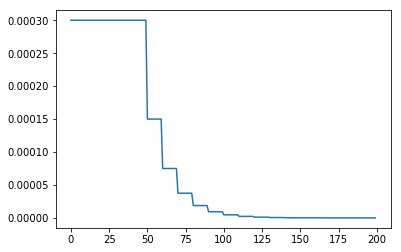

In [6]:
epochs = 10
steps_per_epoch = 100

lr = []
for era in range(1,21):
#     exec(step_decay_cont_str % (epochs, era))
    for j in range(10):
        lr.append(training.step_decay_cont(epochs, era)(j))
plt.plot(np.arange(200), lr)

In [7]:
model = models.TriNet(P_param=P_param, K_param=K_param, weights='imagenet')

[-1, 0, 1, 2, 3]
Weights for the model were loaded successfully
margin 0.2
output dim 128


In [8]:
for l in range(len(model.layers)):
    print l, model.layers[l].name, model.layers[l].output_shape

0 input_1 (None, 256, 128, 3)
1 conv2d_1 (None, 128, 64, 64)
2 batch_normalization_1 (None, 128, 64, 64)
3 activation_1 (None, 128, 64, 64)
4 max_pooling2d_1 (None, 64, 32, 64)
5 batch_normalization_2 (None, 64, 32, 64)
6 activation_2 (None, 64, 32, 64)
7 conv2d_2 (None, 64, 32, 128)
8 batch_normalization_3 (None, 64, 32, 128)
9 activation_3 (None, 64, 32, 128)
10 conv2d_3 (None, 64, 32, 32)
11 concatenate_1 (None, 64, 32, 96)
12 batch_normalization_4 (None, 64, 32, 96)
13 activation_4 (None, 64, 32, 96)
14 conv2d_4 (None, 64, 32, 128)
15 batch_normalization_5 (None, 64, 32, 128)
16 activation_5 (None, 64, 32, 128)
17 conv2d_5 (None, 64, 32, 32)
18 concatenate_2 (None, 64, 32, 128)
19 batch_normalization_6 (None, 64, 32, 128)
20 activation_6 (None, 64, 32, 128)
21 conv2d_6 (None, 64, 32, 128)
22 batch_normalization_7 (None, 64, 32, 128)
23 activation_7 (None, 64, 32, 128)
24 conv2d_7 (None, 64, 32, 32)
25 concatenate_3 (None, 64, 32, 160)
26 batch_normalization_8 (None, 64, 32, 160)
27

In [9]:
model.set_weights(np.load('./models/trinet_P5K4_2/trinet_P5K4_2_5000.npy'))

In [10]:
history = History()
for era in range(6,16):
    iterations = era * epochs * steps_per_epoch
    lrate = LearningRateScheduler(training.step_decay_cont(epochs, era))

    print 'era, ' + str(era)

    model.fit_generator(data.batch_generator(train_dict, P=P_param, K=K_param,
                            preprocess=True, shape=(256,128)),
                         steps_per_epoch=steps_per_epoch,
                         epochs=epochs,
                         callbacks=[lrate,history])

    path = training.save_weights(model, it=iterations, root='trinet_P5K4_2')

    print evaluation.get_score(model)

era, 6
Epoch 1/10
100/100 [==============================] - 63s - loss: 31.7792    
Epoch 2/10
100/100 [==============================] - 55s - loss: 41.2922    
Epoch 3/10
100/100 [==============================] - 56s - loss: 31.0041    
Epoch 4/10
100/100 [==============================] - 56s - loss: 22.4810    
Epoch 5/10
100/100 [==============================] - 56s - loss: 20.6092    
Epoch 6/10
100/100 [==============================] - 56s - loss: 17.2124    
Epoch 7/10
100/100 [==============================] - 56s - loss: 24.1034    
Epoch 8/10
100/100 [==============================] - 56s - loss: 21.8158    
Epoch 9/10
100/100 [==============================] - 56s - loss: 19.4392    
Epoch 10/10
100/100 [==============================] - 56s - loss: 17.8074    
1000 29.2998681068
2000 56.741863966
3000 84.0161931515
4000 111.285645962
5000 138.627252102
6000 166.376002073
7000 194.106207132
8000 221.987797022
9000 248.9715271
10000 275.799378157
11000 303.176195145
1200

4000 79.6306610107
5000 99.5448169708
6000 119.449069977
7000 139.365936995
8000 159.264522076
9000 179.166373968
10000 199.078164101
11000 218.990277052
12000 238.892825127
13000 258.812232018
14000 278.712371111
15000 298.617615938
1000 19.9117259979
2000 39.8077280521
3000 59.7292881012
metric time: 144.895342
{'mAP': 0.52549999999999997, 'rank': {'r5': 0.8812, 'r1': 0.7173}, 'loss': []}
era, 13
Epoch 1/10
100/100 [==============================] - 56s - loss: 2.4451    
Epoch 2/10
100/100 [==============================] - 56s - loss: 4.0750    
Epoch 3/10
100/100 [==============================] - 56s - loss: 3.1801    
Epoch 4/10
100/100 [==============================] - 56s - loss: 3.8162    
Epoch 5/10
100/100 [==============================] - 56s - loss: 3.5062    
Epoch 6/10
100/100 [==============================] - 56s - loss: 2.4339    
Epoch 7/10
100/100 [==============================] - 56s - loss: 3.1167    
Epoch 8/10
100/100 [==============================] - 56s -